# Evaluación de modelos predictivos

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


## Carga del dataset procesado

In [2]:
ruta = "../datos/procesados/enfermedades_sintomas_limpio.csv"
df = pd.read_csv(ruta)

df.head()


,diseases,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Separación de variables y codificación

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df.drop(columns=["diseases"])
y = df["diseases"]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


## División entrenamiento / test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42
)


## Carga del modelo seleccionado

Se evalúa el modelo con mejor rendimiento obtenido en la fase de entrenamiento: Regresión Logística.

In [5]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1)

## Predicciones sobre el conjunto de test

In [6]:
y_pred = modelo.predict(X_test)

## Métricas globales de evaluación

### Accuracy

In [7]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.834748220406011

El modelo alcanza una accuracy aproximada del 83,5 %, lo que representa un resultado notable teniendo en cuenta la elevada complejidad del problema, con más de 700 clases distintas y un espacio de características de alta dimensionalidad.


### Precision, Recall y F1-score

In [13]:
print(classification_report(
    y_test,
    y_pred,
    zero_division=0
))


              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.87      0.96      0.91        49
           2       0.79      0.76      0.77        29
           3       0.00      0.00      0.00         1
           4       0.63      0.88      0.73        25
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.82      0.74      0.78        82
           9       0.95      0.70      0.80       155
          10       0.89      0.93      0.91       238
          11       0.90      0.64      0.74       247
          12       0.72      0.82      0.77       166
          14       0.27      0.20      0.23        30
          15       0.98      0.92      0.95       168
          16       0.69      0.83      0.75       108
          17       0.88      0.88      0.88       243
          18       0.75    

Dado el elevado número de clases y la naturaleza multiclase del problema, se utilizan métricas adicionales a la accuracy para evaluar el rendimiento del modelo de forma más robusta. El F1-score permite equilibrar precisión y exhaustividad en un contexto con clases desbalanceadas.

## Matriz de confusión (top 10 enfermedades)

In [10]:
# Selección de las 10 enfermedades más frecuentes
top_diseases = (
    pd.Series(y)
    .value_counts()
    .head(10)
    .index
)

top_indices = [
    encoder.transform([d])[0]
    for d in top_diseases
]

# Filtrar test
mask = np.isin(y_test, top_indices)
y_test_top = y_test[mask]
y_pred_top = y_pred[mask]

cm = confusion_matrix(
    y_test_top,
    y_pred_top,
    labels=top_indices
)

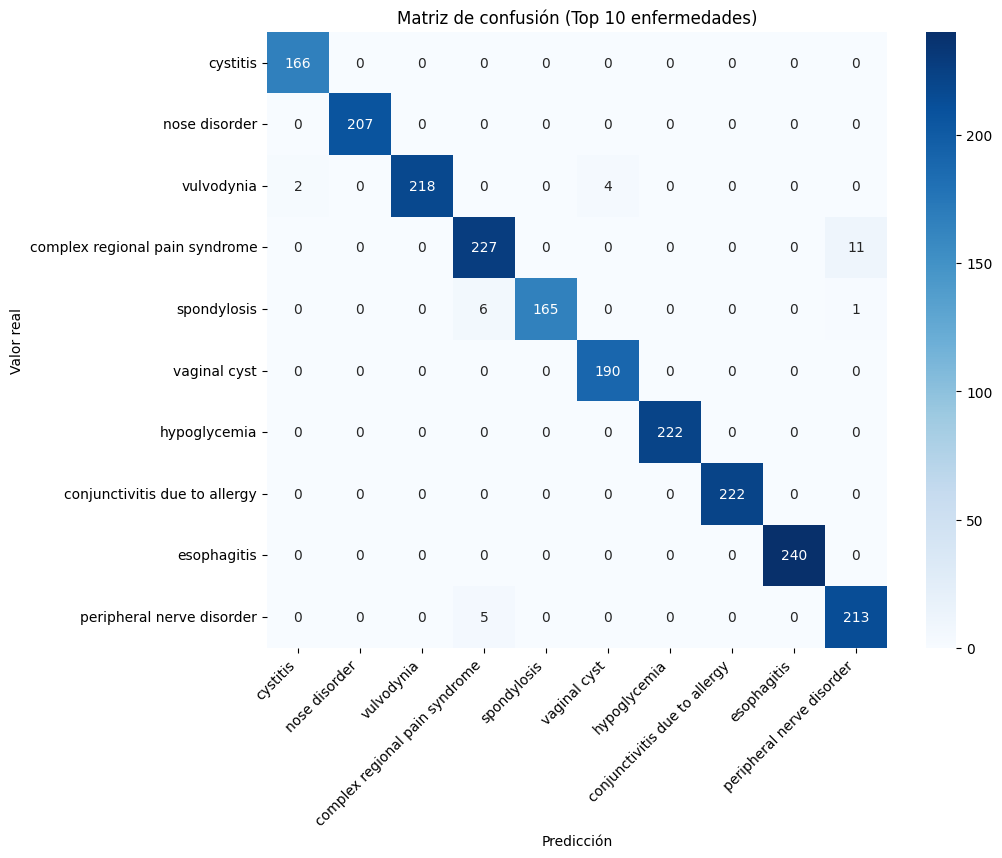

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=top_diseases,
    yticklabels=top_diseases
)
plt.title("Matriz de confusión (Top 10 enfermedades)")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


La matriz de confusión correspondiente a las 10 enfermedades más frecuentes muestra una clara predominancia de valores en la diagonal principal, lo que indica una alta tasa de aciertos en estas clases. Las pocas confusiones observadas se producen entre enfermedades con perfiles sintomáticos similares, lo cual resulta coherente desde un punto de vista clínico.


## Análisis de errores del modelo

In [14]:
errores = X_test[y_test != y_pred].copy()
errores["real"] = encoder.inverse_transform(y_test[y_test != y_pred])
errores["predicho"] = encoder.inverse_transform(y_pred[y_test != y_pred])

errores.head()


,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness,real,predicho
155695,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,hyperemesis gravidarum,hiatal hernia
117249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,acute respiratory distress syndrome (ards),acute bronchiolitis
2113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,vaginitis,vaginal yeast infection
170401,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,personality disorder,neurosis
118253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,tendinitis,sprain or strain


El análisis de los errores confirma que la mayoría de las predicciones incorrectas se deben a la superposición de síntomas entre distintas enfermedades. Dado que el modelo utiliza únicamente información binaria de síntomas, este comportamiento es esperable y refleja una limitación inherente al enfoque, más que un fallo del algoritmo.

## Conclusión final

En conjunto, el modelo de regresión logística demuestra un rendimiento sólido y estable en un problema multiclase de gran complejidad. A pesar del elevado número de enfermedades distintas, el sistema es capaz de identificar patrones relevantes entre síntomas y patologías, lo que lo convierte en una herramienta válida como sistema de apoyo a la decisión, aunque no sustitutiva del diagnóstico médico profesional.
